In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import tslearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import timestring
import datetime

In [57]:
StockMarket = pd.read_csv("StockData.csv", sep = ",")
NewsData = pd.read_csv("NewsData.csv", sep=",")

NewsData.head()



StockDate CompanyName  \
0  April 30, 2019 17:00 pm +08      HLBANK   
1  April 30, 2019 09:10 am +08      HLBANK   
2  April 26, 2019 10:18 am +08      HLBANK   
3  April 18, 2019 13:10 pm +08      HLBANK   
4  April 18, 2019 10:21 am +08      HLBANK   

                                          NewsHeader  \
0  Are banks worth a second look as half of them ...   
1  KLCI drifts lower in line with region, key Chi...   
2  KLCI retreats in line with subdued regional ma...   
3       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  
0  https://www.theedgemarkets.com/article/are-ban...  
1  https://www.theedgemarkets.com/article/klci-dr...  
2  https://www.theedgemarkets.com/article/klci-re...  
3  https://www.theedgemarkets.com/article/klci-fa...  
4  https://www.theedgemarkets.com/article/klci-st...

In [58]:
NewsData["StockDate"]= NewsData["StockDate"].apply(lambda x:timestring.Date(x).date)
NewsData.head()

StockDate CompanyName  \
0 2019-04-30 17:00:00      HLBANK   
1 2019-04-30 09:10:00      HLBANK   
2 2019-04-26 10:18:00      HLBANK   
3 2019-04-18 13:10:00      HLBANK   
4 2019-04-18 10:21:00      HLBANK   

                                          NewsHeader  \
0  Are banks worth a second look as half of them ...   
1  KLCI drifts lower in line with region, key Chi...   
2  KLCI retreats in line with subdued regional ma...   
3       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  
0  https://www.theedgemarkets.com/article/are-ban...  
1  https://www.theedgemarkets.com/article/klci-dr...  
2  https://www.theedgemarkets.com/article/klci-re...  
3  https://www.theedgemarkets.com/article/klci-fa...  
4  https://www.theedgemarkets.com/article/klci-st...

In [59]:
NewsData["StockDate"] = NewsData["StockDate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
NewsData.head()

StockDate CompanyName                                         NewsHeader  \
0  2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1  2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2  2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3  2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  
0  https://www.theedgemarkets.com/article/are-ban...  
1  https://www.theedgemarkets.com/article/klci-dr...  
2  https://www.theedgemarkets.com/article/klci-re...  
3  https://www.theedgemarkets.com/article/klci-fa...  
4  https://www.theedgemarkets.com/article/klci-st...

In [60]:
NewsData["headerpolarity"] = [TextBlob(NewsData["NewsHeader"].iloc[i]).polarity for i in range(0,NewsData.shape[0])]


In [61]:
NewsData["newsinfopolarity"] = [TextBlob(NewsData["NewsInfo"].iloc[i]).polarity for i in range(0,NewsData.shape[0])]
NewsData.head()

StockDate CompanyName                                         NewsHeader  \
0  2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1  2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2  2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3  2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  headerpolarity  \
0  https://www.theedgemarkets.com/article/are-ban...        0.044444   
1  https://www.theedgemarkets.com/article/klci-dr...        0.000000   
2  https://www.theedgemarkets.com/article/klci-re...        0.000000   
3  https://www.theedgemarkets.com/article/klci-fa...        0.000000   
4  https://www.theedgemarkets.com/article/klci-st...       -0.150000   

   newsinfopolarity  
0          0.101884  
1          0.093237  
2          0.023519  
3         -0.050418  
4         -0.040598

In [62]:
NewsData['polarity'] = NewsData[['headerpolarity','newsinfopolarity']].sum(axis=1)
NewsData.head()

StockDate CompanyName                                         NewsHeader  \
0  2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1  2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2  2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3  2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  headerpolarity  \
0  https://www.theedgemarkets.com/article/are-ban...        0.044444   
1  https://www.theedgemarkets.com/article/klci-dr...        0.000000   
2  https://www.theedgemarkets.com/article/klci-re...        0.000000   
3  https://www.theedgemarkets.com/article/klci-fa...        0.000000   
4  https://www.theedgemarkets.com/article/klci-st...       -0.150000   

   newsinfopolarity  polarity  
0          0.101884  0.146329  
1          0.093237  0.093237  
2          0.023519  0.023519  
3         -0.050418 -0.050418  
4         -0.040598 -0.190598

In [63]:
MAHSING_NewsData = NewsData


In [64]:
MAHSING_NewsData = MAHSING_NewsData.iloc[np.where(NewsData["CompanyName"]=="MAHSING")]
MAHSING_NewsData

StockDate CompanyName                                         NewsHeader  \
39  2019-04-05     MAHSING  Mah Sing to launch Ramada Meridin Johor Bahru ...   
40  2019-04-01     MAHSING  Mah Sing’s Mukim Petaling land buy deemed posi...   
41  2019-03-29     MAHSING  Mah Sing buys land in Kuala Lumpur for RM500m ...   
42  2019-03-29     MAHSING     KLCI seen moving sideways, resistance at 1,650   
43  2019-03-28     MAHSING  Gamuda, Eco World Development, Eco World Inter...   
44  2019-03-28     MAHSING  Mah Sing buys land in Kuala Lumpur for RM500m ...   
45  2019-03-20     MAHSING  Mah Sing allocates RM28m for digitalisation in...   
46  2019-03-19     MAHSING  Mah Sing allocates RM28m for digitalisation in...   
47  2019-03-15     MAHSING  PM's Dept: If Tabung Haji practices prudent ac...   
48  2019-03-07     MAHSING  Huge turnout at the launch of Dasar Komuniti N...   
49  2019-03-01     MAHSING  Mah Sing seen in strong position to expand lan...   

                                             NewsInfo  \
39  Mah Sing Group Bhd plans to officially launch ...   
40  Mah Sing Group Bhd\n(March 29, 93 sen)\nUpgrad...   
41  KUALA LUMPUR: Mah Sing Group Bhd is back in ac...   
42  KUALA LUMPUR (March 29): The FBM KLCI is seen ...   
43  KUALA LUMPUR (March 28): Based on corporate an...   
44   KUALA LUMPUR (March 28): Mah Sing Group Bhd i...   
45  KUALA LUMPUR: Mah Sing Group Bhd has allocated...   
46  KUALA LUMPUR (March 19): Mah Sing Group Bhd ha...   
47  KUALA LUMPUR (March 15): The non-performing as...   
48  More than 5,000 people turned up for the offic...   
49  Mah Sing Group Bhd\n(Feb 28, RM1)\nMaintain bu...   

                                             NewsLink  headerpolarity  \
39  https://www.theedgemarkets.com/article/mah-sin...        0.000000   
40  https://www.theedgemarkets.com/article/mah-sin...        0.227273   
41  https://www.theedgemarkets.com/article/mah-sin...        0.000000   
42  https://www.theedgemarkets.com/article/klci-se...        0.000000   
43  https://www.theedgemarkets.com/article/gamuda-...       -0.100000   
44  https://www.theedgemarkets.com/article/mah-sin...        0.000000   
45  https://www.theedgemarkets.com/article/mah-sin...        0.000000   
46  https://www.theedgemarkets.com/article/mah-sin...        0.000000   
47  https://www.theedgemarkets.com/article/pms-dep...        0.000000   
48  https://www.theedgemarkets.com/article/huge-tu...        0.400000   
49  https://www.theedgemarkets.com/article/mah-sin...        0.433333   

    newsinfopolarity  polarity  
39          0.226703  0.226703  
40          0.096566  0.323838  
41          0.177596  0.177596  
42          0.094643  0.094643  
43          0.038562 -0.061438  
44          0.167090  0.167090  
45          0.062518  0.062518  
46          0.055464  0.055464  
47          0.045960  0.045960  
48          0.124426  0.524426  
49          0.129807  0.563141

In [65]:
MAHSING_NewsData.index = pd.to_datetime(MAHSING_NewsData["StockDate"])
# MAHSING _news.loc[:'2019-03-01']

In [66]:
MAHSING_NewsData1 = MAHSING_NewsData.loc["2019-04-30":"2019-04-01"].resample("B").sum()
MAHSING_NewsData1

headerpolarity  newsinfopolarity  polarity
StockDate                                             
2019-04-05             0.0          0.226703  0.226703

In [67]:
MAHSING_StockMarket = StockMarket.loc[np.where(StockMarket["companyname"]=="MAHSING")]
MAHSING_StockMarket

Id            stockdate       sector   subsector companyname  \
3077  3078  2019-04-01 16:00:00  main_market  properties     MAHSING   
3078  3079  2019-04-02 16:00:00  main_market  properties     MAHSING   
3079  3080  2019-04-03 16:00:00  main_market  properties     MAHSING   
3080  3081  2019-04-04 16:00:00  main_market  properties     MAHSING   
3081  3082  2019-04-07 16:00:00  main_market  properties     MAHSING   
3082  3083  2019-04-08 16:00:00  main_market  properties     MAHSING   
3083  3084  2019-04-09 16:00:00  main_market  properties     MAHSING   
3084  3085  2019-04-10 16:00:00  main_market  properties     MAHSING   
3085  3086  2019-04-11 16:00:00  main_market  properties     MAHSING   
3086  3087  2019-04-14 16:00:00  main_market  properties     MAHSING   
3087  3088  2019-04-15 16:00:00  main_market  properties     MAHSING   
3088  3089  2019-04-16 16:00:00  main_market  properties     MAHSING   
3089  3090  2019-04-17 16:00:00  main_market  properties     MAHSING   
3090  3091  2019-04-18 16:00:00  main_market  properties     MAHSING   
3091  3092  2019-04-21 16:00:00  main_market  properties     MAHSING   
3092  3093  2019-04-22 16:00:00  main_market  properties     MAHSING   
3093  3094  2019-04-23 16:00:00  main_market  properties     MAHSING   
3094  3095  2019-04-24 16:00:00  main_market  properties     MAHSING   
3095  3096  2019-04-25 16:00:00  main_market  properties     MAHSING   
3096  3097  2019-04-28 16:00:00  main_market  properties     MAHSING   
3097  3098  2019-04-29 16:00:00  main_market  properties     MAHSING   

     stockcode  openprice  highprice  lowprice  lastprice   volume  \
3077      8583      0.935      0.935     0.925      0.935   340800   
3078      8583      0.925      0.940     0.925      0.930   140500   
3079      8583      0.935      0.940     0.925      0.935   385500   
3080      8583      0.935      0.940     0.925      0.930   305800   
3081      8583      0.925      0.940     0.925      0.935   477900   
3082      8583      0.930      0.940     0.920      0.935   717700   
3083      8583      0.935      0.950     0.930      0.940   532200   
3084      8583      0.940      0.955     0.930      0.940  1380600   
3085      8583      0.945      0.945     0.935      0.945   132800   
3086      8583      0.945      0.950     0.935      0.940   253700   
3087      8583      0.935      0.945     0.925      0.940   334100   
3088      8583      0.935      0.935     0.930      0.930   118700   
3089      8583      0.935      0.940     0.925      0.925   233400   
3090      8583      0.925      0.935     0.925      0.935   179600   
3091      8583      0.935      0.940     0.930      0.935   437700   
3092      8583      0.940      0.950     0.930      0.945   440700   
3093      8583      0.935      0.945     0.935      0.945   609700   
3094      8583      0.945      0.960     0.935      0.950  1043000   
3095      8583      0.955      0.965     0.950      0.960   269500   
3096      8583      0.965      0.970     0.960      0.965   876200   
3097      8583      0.965      0.970     0.950      0.960   411700   

               created_at  
3077  2019-04-30 17:27:42  
3078  2019-04-30 17:27:42  
3079  2019-04-30 17:27:42  
3080  2019-04-30 17:27:42  
3081  2019-04-30 17:27:42  
3082  2019-04-30 17:27:42  
3083  2019-04-30 17:27:42  
3084  2019-04-30 17:27:42  
3085  2019-04-30 17:27:42  
3086  2019-04-30 17:27:42  
3087  2019-04-30 17:27:42  
3088  2019-04-30 17:27:42  
3089  2019-04-30 17:27:42  
3090  2019-04-30 17:27:42  
3091  2019-04-30 17:27:42  
3092  2019-04-30 17:27:42  
3093  2019-04-30 17:27:42  
3094  2019-04-30 17:27:42  
3095  2019-04-30 17:27:42  
3096  2019-04-30 17:27:42  
3097  2019-04-30 17:27:42

In [68]:
MAHSING_StockMarket["stockdate"] = MAHSING_StockMarket["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
MAHSING_StockMarket.head()

Id   stockdate       sector   subsector companyname stockcode  \
3077  3078  2019-04-01  main_market  properties     MAHSING      8583   
3078  3079  2019-04-02  main_market  properties     MAHSING      8583   
3079  3080  2019-04-03  main_market  properties     MAHSING      8583   
3080  3081  2019-04-04  main_market  properties     MAHSING      8583   
3081  3082  2019-04-07  main_market  properties     MAHSING      8583   

      openprice  highprice  lowprice  lastprice  volume           created_at  
3077      0.935      0.935     0.925      0.935  340800  2019-04-30 17:27:42  
3078      0.925      0.940     0.925      0.930  140500  2019-04-30 17:27:42  
3079      0.935      0.940     0.925      0.935  385500  2019-04-30 17:27:42  
3080      0.935      0.940     0.925      0.930  305800  2019-04-30 17:27:42  
3081      0.925      0.940     0.925      0.935  477900  2019-04-30 17:27:42

In [69]:
MAHSING_StockMarket.index = pd.to_datetime(MAHSING_StockMarket["stockdate"])
MAHSING_StockMarket.loc['2019-04-01':]

Id   stockdate       sector   subsector companyname stockcode  \
stockdate                                                                     
2019-04-01  3078  2019-04-01  main_market  properties     MAHSING      8583   
2019-04-02  3079  2019-04-02  main_market  properties     MAHSING      8583   
2019-04-03  3080  2019-04-03  main_market  properties     MAHSING      8583   
2019-04-04  3081  2019-04-04  main_market  properties     MAHSING      8583   
2019-04-07  3082  2019-04-07  main_market  properties     MAHSING      8583   
2019-04-08  3083  2019-04-08  main_market  properties     MAHSING      8583   
2019-04-09  3084  2019-04-09  main_market  properties     MAHSING      8583   
2019-04-10  3085  2019-04-10  main_market  properties     MAHSING      8583   
2019-04-11  3086  2019-04-11  main_market  properties     MAHSING      8583   
2019-04-14  3087  2019-04-14  main_market  properties     MAHSING      8583   
2019-04-15  3088  2019-04-15  main_market  properties     MAHSING      8583   
2019-04-16  3089  2019-04-16  main_market  properties     MAHSING      8583   
2019-04-17  3090  2019-04-17  main_market  properties     MAHSING      8583   
2019-04-18  3091  2019-04-18  main_market  properties     MAHSING      8583   
2019-04-21  3092  2019-04-21  main_market  properties     MAHSING      8583   
2019-04-22  3093  2019-04-22  main_market  properties     MAHSING      8583   
2019-04-23  3094  2019-04-23  main_market  properties     MAHSING      8583   
2019-04-24  3095  2019-04-24  main_market  properties     MAHSING      8583   
2019-04-25  3096  2019-04-25  main_market  properties     MAHSING      8583   
2019-04-28  3097  2019-04-28  main_market  properties     MAHSING      8583   
2019-04-29  3098  2019-04-29  main_market  properties     MAHSING      8583   

            openprice  highprice  lowprice  lastprice   volume  \
stockdate                                                        
2019-04-01      0.935      0.935     0.925      0.935   340800   
2019-04-02      0.925      0.940     0.925      0.930   140500   
2019-04-03      0.935      0.940     0.925      0.935   385500   
2019-04-04      0.935      0.940     0.925      0.930   305800   
2019-04-07      0.925      0.940     0.925      0.935   477900   
2019-04-08      0.930      0.940     0.920      0.935   717700   
2019-04-09      0.935      0.950     0.930      0.940   532200   
2019-04-10      0.940      0.955     0.930      0.940  1380600   
2019-04-11      0.945      0.945     0.935      0.945   132800   
2019-04-14      0.945      0.950     0.935      0.940   253700   
2019-04-15      0.935      0.945     0.925      0.940   334100   
2019-04-16      0.935      0.935     0.930      0.930   118700   
2019-04-17      0.935      0.940     0.925      0.925   233400   
2019-04-18      0.925      0.935     0.925      0.935   179600   
2019-04-21      0.935      0.940     0.930      0.935   437700   
2019-04-22      0.940      0.950     0.930      0.945   440700   
2019-04-23      0.935      0.945     0.935      0.945   609700   
2019-04-24      0.945      0.960     0.935      0.950  1043000   
2019-04-25      0.955      0.965     0.950      0.960   269500   
2019-04-28      0.965      0.970     0.960      0.965   876200   
2019-04-29      0.965      0.970     0.950      0.960   411700   

                     created_at  
stockdate                        
2019-04-01  2019-04-30 17:27:42  
2019-04-02  2019-04-30 17:27:42  
2019-04-03  2019-04-30 17:27:42  
2019-04-04  2019-04-30 17:27:42  
2019-04-07  2019-04-30 17:27:42  
2019-04-08  2019-04-30 17:27:42  
2019-04-09  2019-04-30 17:27:42  
2019-04-10  2019-04-30 17:27:42  
2019-04-11  2019-04-30 17:27:42  
2019-04-14  2019-04-30 17:27:42  
2019-04-15  2019-04-30 17:27:42  
2019-04-16  2019-04-30 17:27:42  
2019-04-17  2019-04-30 17:27:42  
2019-04-18  2019-04-30 17:27:42  
2019-04-21  2019-04-30 17:27:42  
2019-04-22  2019-04-30 17:27:42  
2019-04-23  2019-04-30 17:27:42  
2019-04-24  2019-04-30 17:27:42

In [70]:
MAHSING = pd.concat([MAHSING_StockMarket["highprice"],MAHSING_NewsData1["polarity"]]
                      , keys = ["stockprice","newspolarity"], axis = 1).ffill().bfill()
MAHSING

stockprice  newspolarity
2019-04-01       0.935      0.226703
2019-04-02       0.940      0.226703
2019-04-03       0.940      0.226703
2019-04-04       0.940      0.226703
2019-04-05       0.940      0.226703
2019-04-07       0.940      0.226703
2019-04-08       0.940      0.226703
2019-04-09       0.950      0.226703
2019-04-10       0.955      0.226703
2019-04-11       0.945      0.226703
2019-04-14       0.950      0.226703
2019-04-15       0.945      0.226703
2019-04-16       0.935      0.226703
2019-04-17       0.940      0.226703
2019-04-18       0.935      0.226703
2019-04-21       0.940      0.226703
2019-04-22       0.950      0.226703
2019-04-23       0.945      0.226703
2019-04-24       0.960      0.226703
2019-04-25       0.965      0.226703
2019-04-28       0.970      0.226703
2019-04-29       0.970      0.226703

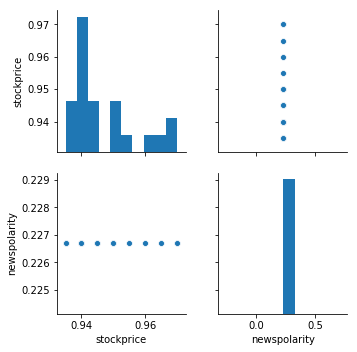

In [71]:
sns.pairplot(MAHSING)

In [72]:
cov_mat = MAHSING.cov()
cov_mat

stockprice  newspolarity
stockprice    1.179654e-04 -2.934750e-34
newspolarity -2.934750e-34  3.228225e-33

In [74]:
corr_mat= MAHSING.corr()
corr_mat

stockprice  newspolarity
stockprice    1.000000e+00 -4.755673e-16
newspolarity -4.755673e-16  1.000000e+00

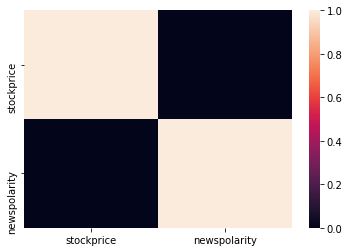

In [75]:
sns.heatmap(corr_mat)